# **2. Exploratory Data Analysis**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistics imports
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency 
from statsmodels.graphics.gofplots import qqplot # normality plot
from scipy.stats import shapiro # Normality test


## **2.1 Load Data**

In [2]:
df=pd.read_csv('data_eda.csv')

In [3]:
df.shape

(16000, 182)

## **2.2 Analysis of Users**

In [4]:
print('There is a total of', df['username_y'].nunique(), 'unique users.')

There is a total of 8696 unique users.


**Note:** Some columns are related to users as account usage, total reviews, etc. I will create a new dataframe for user-related analysis.

In [5]:
# check the users' names
df.sort_values(by='user_reviews_total', ascending=False)[['username_y','user_reviews_total', 
                                                          'voteSum', 'voteSum','user_account_usage',
                                                          'rating']].head()

,username_y,user_reviews_total,voteSum,voteSum,user_account_usage,rating
13591,Drakemeetslara,636,0,0,33444840,3
7401,Drakemeetslara,636,0,0,33444840,5
959,Drakemeetslara,636,0,0,33444840,5
14565,Drakemeetslara,636,0,0,33444840,5
7219,Drakemeetslara,636,0,0,33444840,5


In [6]:
# create a df from columns which are related to users
users = df[['username_y', 'label', 'user_reviews_1','user_reviews_2', 'user_reviews_3', 
            'user_reviews_4', 'user_reviews_5', 'rating', 'price', 'length', 
            'user_account_usage', 'user_reviews_total','voteSum', 'voteCount']]
users.head()

,username_y,label,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5,rating,price,length,user_account_usage,user_reviews_total,voteSum,voteCount
0,Haydensimpkins93,0,0.0,0.0,0.000000,0.000000,100.000000,5,0.00,187,0,1,0,0
1,Spamminton13,0,0.0,0.0,25.000000,25.000000,50.000000,5,0.00,105,65517000,4,0,0
2,Graster 15,0,0.0,0.0,16.666667,16.666667,66.666667,5,1.99,88,49330200,6,0,0
3,Dhaisley,0,0.0,0.0,0.000000,80.000000,20.000000,4,0.00,206,27965940,5,0,0
4,Jay5050,0,0.0,0.0,0.000000,0.000000,100.000000,5,0.00,85,32929440,2,0,0


In [7]:
# Get the average of 'label','length','rating', 'price', 'paid' columns
df_use = users.groupby(by='username_y')['label','length','rating', 'price'].agg('mean')
df_use.head()

,label,length,rating,price
username_y,,,,
Dede U,0.0,21.0,4.0,0.00
I'm Sirius,0.0,27.0,5.0,0.00
Monty 88,0.0,19.0,5.0,0.00
maniac k,0.0,51.0,4.0,0.99
!Do!,0.0,54.0,4.0,0.00


In [8]:
# Rename columns
df_use = df_use.add_prefix('ave_')

In [9]:
# Reset index for using username column
df_use.reset_index(inplace=True)

In [10]:
# Drop duplicates in username column
users.drop_duplicates(subset=['username_y'], inplace=True)

# drop the columns which I got the averages
users.drop(columns=['label','length','rating', 'price'], inplace=True)

# check the shape of column. There should be 8696 unique users
users.shape

(8696, 10)

In [11]:
# Merge two dataframe
users = df_use.merge(users, on='username_y', how='inner')
print(users.shape)
users.head()

(8696, 14)


,username_y,ave_label,ave_length,ave_rating,ave_price,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5,user_account_usage,user_reviews_total,voteSum,voteCount
0,Dede U,0.0,21.0,4.0,0.00,0.000000,0.0,0.000000,66.666667,33.333333,150993180,6,0,0
1,I'm Sirius,0.0,27.0,5.0,0.00,25.000000,0.0,0.000000,0.000000,75.000000,190985640,4,0,0
2,Monty 88,0.0,19.0,5.0,0.00,22.222222,0.0,11.111111,22.222222,44.444444,175860060,9,0,0
3,maniac k,0.0,51.0,4.0,0.99,20.000000,20.0,0.000000,60.000000,0.000000,49271580,5,0,0
4,!Do!,0.0,54.0,4.0,0.00,9.090909,0.0,9.090909,18.181818,63.636364,145384260,11,0,0


In [12]:
users.isna().sum()

username_y              0
ave_label               0
ave_length              0
ave_rating              0
ave_price             101
user_reviews_1          0
user_reviews_2          0
user_reviews_3          0
user_reviews_4          0
user_reviews_5          0
user_account_usage      0
user_reviews_total      0
voteSum                 0
voteCount               0
dtype: int64

***The average label of users*** 

In [13]:
users.ave_label.value_counts(normalize=True)

0.000000    0.919158
1.000000    0.080497
0.976744    0.000115
0.857143    0.000115
0.888889    0.000115
Name: ave_label, dtype: float64

**Note:** 7993 (91.916%) out of 8696 users haven't posted any fake reviews. A total of 700 (%8.049) users' all reviews are fake. Three users (0.03%) have both fake and genuine reviews and the percent of fake reviews is really high. The likelihood of being a fake user is so high. Therefore these 3 users are labeled as fake (1).

In [14]:
# Find the index of these users
users[(users['ave_label']!=0)&(users['ave_label']!=1)]

,username_y,ave_label,ave_length,ave_rating,ave_price,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5,user_account_usage,user_reviews_total,voteSum,voteCount
3765,Kch145,0.976744,127.604651,4.976744,0.092558,0.0,0.0,0.0,2.739726,97.260274,62102820,73,0,0
7876,iOSLover90,0.857143,75.285714,4.142857,0.000000,0.0,0.0,10.0,70.000000,20.000000,19305060,10,0,0
8246,nestorov90us,0.888889,156.777778,5.000000,0.000000,0.0,0.0,0.0,2.380952,97.619048,10694880,378,0,0


In [15]:
# Let's label three users as fake
users.at[3765, 'ave_label'] = 1
users.at[7876, 'ave_label'] = 1
users.at[8246, 'ave_label'] = 1

**Note:** I have a new feature as label of users. 
Fake User (label=1) and Real User (label=0).

***Fake user:*** Except for 3 cases, all the reviews of these users are fake. For 3 cases minimum average percentage of fake reviews is 85%.

***Real Users:*** They don't have any fake reviews.

In [16]:
# Check the percentages
users.ave_label.value_counts(normalize=True)

0.0    0.919158
1.0    0.080842
Name: ave_label, dtype: float64

In [17]:
# Rename column
users.rename(columns={'ave_label':'user_label'}, inplace=True)

In [18]:
# Merge users dataframe to main df
# In users df, there are information related to unique users' info.
# Get this columns
df_merge = users[['username_y','user_label','ave_length','ave_rating','ave_price']]

df = df.merge(df_merge, how='left', on='username_y')


In [19]:
# Rename for further statistics
users.rename(columns={'user_label':'label'}, inplace=True)

### **2.2.1 Ratings Given by  All Users**

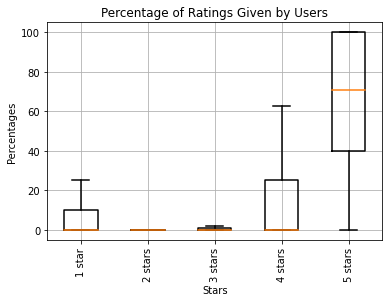

In [20]:
ax = users[['user_reviews_1','user_reviews_2', 'user_reviews_3', 
       'user_reviews_4', 'user_reviews_5']].plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=0)
ax.set_title('Percentage of Ratings Given by Users')
ax.set_xlabel('Stars')
ax.set_ylabel('Percentages')
ax.set_xticklabels(labels = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], rotation=90)

plt.show()

### **2.2.2 Ratings Given by Users: Fake vs. Real Users**

In [21]:
g = users.groupby('label')['user_reviews_1','user_reviews_2', 'user_reviews_3',
                           'user_reviews_4', 'user_reviews_5'].mean()
g

,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5
label,,,,,
0.0,10.436133,3.507758,6.063045,15.852283,64.140781
1.0,4.147377,1.710628,4.588503,18.311390,71.242102


<Figure size 2160x576 with 0 Axes>

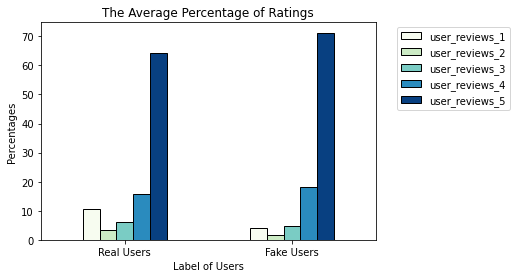

In [22]:
plt.figure(figsize=(30,8))
g=g.reset_index()
g.plot(x='label', y=['user_reviews_1','user_reviews_2', 'user_reviews_3', 'user_reviews_4', 'user_reviews_5'],
       kind="bar",  colormap='GnBu',edgecolor = "black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('The Average Percentage of Ratings')
plt.xticks([0, 1], ['Real Users', 'Fake Users'], rotation=0)
plt.xlabel('Label of Users')
plt.ylabel('Percentages')
plt.show()

### **2.2.3 Users who have 1 review**

In [23]:
print('The number of users who has just 1 review is', len(users[users### **2.2.2 Ratings Given by Users: Fake vs. Real Users**
["user_reviews_total"]==1]))

The number of users who has just 1 review is 1734


In [24]:
print('Number of fake users who have just one review:', len(users[(users["user_reviews_total"]==1)& (users["label"]==1)]))
print('Number of real users who have just one review:', len(users[(users["user_reviews_total"]==1)& (users["label"]==0)]))

Number of fake users who have just one review: 31
Number of real users who have just one review: 1703


In [25]:
print(round(1703/1734*100, 3), 'percentage of users who have 1 review are real.')

98.212 percentage of users who have 1 review are real.


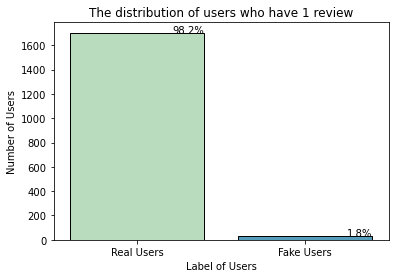

In [26]:
# the crosstable for users who has just 1 review
g = sns.countplot(x = 'label', data =  users[users["user_reviews_total"]==1],palette='GnBu', edgecolor = "black")

g.set_title("The distribution of users who have 1 review", fontsize=12)
g.set(xlabel="Label of Users",
      ylabel="Number of Users")
g.set_xticklabels(['Real Users', 'Fake Users'])

for p in g.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1734)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    g.annotate(percentage, (x, y),ha='right')
plt.show()

***Is there a difference between the fake or real reviews of users who only have one review?***

In [27]:
from scipy.stats import chisquare
chisquare([31, 1703])

Power_divergenceResult(statistic=1612.2168396770473, pvalue=0.0)

### **2.2.4 Users' total reviews: Fake vs. Real Users**

In [28]:
# Descriptive statistics of total reviews.
users.groupby(["label"])["user_reviews_total"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,6.850619,16.464858,1.0,2.0,4.0,7.0,573.0
1.0,703.0,31.503556,50.842948,1.0,6.0,16.0,35.0,636.0


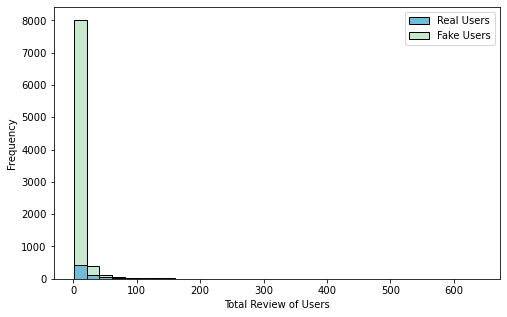

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(x='user_reviews_total', data=users, hue='label', binwidth=20, palette='GnBu'
            ,multiple='stack')
plt.xlabel('Total Review of Users')
plt.ylabel('Frequency')
plt.legend(['Real Users', 'Fake Users'])
plt.show()

<Figure size 1440x720 with 0 Axes>

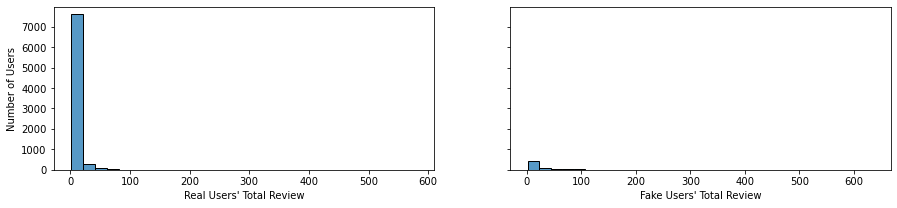

In [30]:
# Histogram of total reviews
plt.figure(figsize=(20,10))
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(users[users['label']==0]['user_reviews_total'], ax=ax0, bins=30, binwidth=20)
sns.histplot(users[users['label']==1]['user_reviews_total'], ax=ax1, bins=30)
ax0.set(xlabel="Real Users' Total Review")
ax1.set(xlabel="Fake Users' Total Review")
ax0.set(ylabel='Number of Users')
plt.show()

***Is there a difference between real and fake users regarding total reviews?***

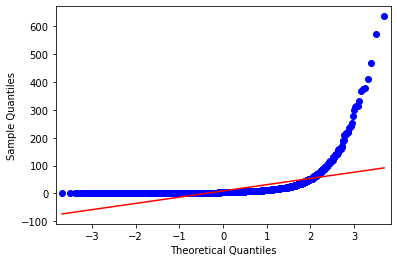

In [31]:
# Check normality
qqplot(users['user_reviews_total'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [32]:
# normality test
stat, p = shapiro(users['user_reviews_total'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.288, p=0.000
Sample does not look Gaussian (reject H0)


In [33]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(users['user_reviews_total'][users['label'] == 0],
                users['user_reviews_total'][users['label'] == 1])
results

MannwhitneyuResult(statistic=1131691.0, pvalue=1.515259439968013e-154)

In [34]:
stats.ttest_ind(users['user_reviews_total'][users['label'] == 0],
                users['user_reviews_total'][users['label'] == 1])

Ttest_indResult(statistic=-29.28479909105381, pvalue=7.114583206267576e-180)

### **2.2.5 Users' vote counts: Fake vs. Real Users**

In [35]:
users.groupby(["label"])["voteCount"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,0.066308,1.088137,0.0,0.0,0.0,0.0,84.0
1.0,703.0,0.045519,0.520989,0.0,0.0,0.0,0.0,12.0


***Is there a difference between real and fake users regarding vote counts?***

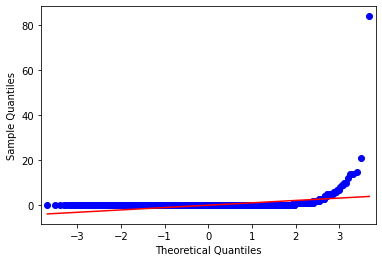

In [36]:
# Check normality
qqplot(users['voteCount'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [37]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(users['voteCount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.031, p=0.000
Sample does not look Gaussian (reject H0)


In [38]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(users['voteCount'][users['label'] == 0],
                users['voteCount'][users['label'] == 1])
results

MannwhitneyuResult(statistic=2825697.5, pvalue=0.3508767334756109)

In [39]:
stats.ttest_ind(users['voteCount'][users['label'] == 0],
                users['voteCount'][users['label'] == 1])

Ttest_indResult(statistic=0.5015014866990243, pvalue=0.6160309300438593)

### **2.2.6 Users' account usage: Fake vs. Real Users**

In [40]:
users.groupby(["label"])["user_account_usage"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,6.594189e+07,6.408793e+07,0.0,3418200.0,49017180.0,114672720.0,272820300.0
1.0,703.0,5.521763e+07,6.092646e+07,0.0,4865220.0,29575380.0,91190310.0,257020620.0


***Is there a difference between real and fake users regarding account usage?***

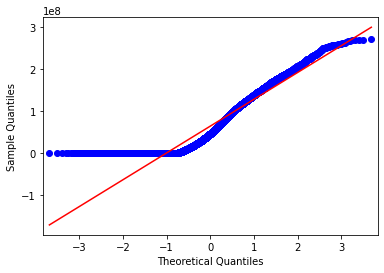

In [41]:
from statsmodels.graphics.gofplots import qqplot

qqplot(users['user_account_usage'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [42]:
# normality test
stat, p = shapiro(users['user_account_usage'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.887, p=0.000
Sample does not look Gaussian (reject H0)


In [43]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(users['user_account_usage'][users['label'] == 0],
                users['user_account_usage'][users['label'] == 1])
results

MannwhitneyuResult(statistic=2938089.5, pvalue=0.04312967621864115)

In [44]:
stats.ttest_ind(users['user_account_usage'][users['label'] == 0],
                users['user_account_usage'][users['label'] == 1])

Ttest_indResult(statistic=4.270296732523434, pvalue=1.9728870755966397e-05)

### **2.2.7 Average rating given by users: Fake vs. Real Users**

In [45]:
users.groupby(["label"])["ave_rating"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,4.197173,1.329563,1.0,4.000000,5.000000,5.0,5.0
1.0,703.0,4.603794,0.544046,1.0,4.320513,4.857143,5.0,5.0


***Is there a difference between real and fake users in terms of the average of the rating they give?***

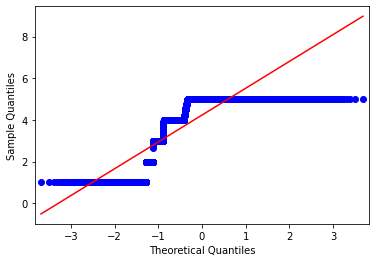

In [46]:
# plot for normality
qqplot(users['ave_rating'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [47]:
# normality test
stat, p = shapiro(users['ave_rating'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.634, p=0.000
Sample does not look Gaussian (reject H0)


In [48]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(users['ave_rating'][users['label'] == 0],
                users['ave_rating'][users['label'] == 1])
results

MannwhitneyuResult(statistic=2933236.5, pvalue=0.024844052221876804)

In [49]:
stats.ttest_ind(users['ave_rating'][users['label'] == 0],
                users['ave_rating'][users['label'] == 1])

Ttest_indResult(statistic=-8.049438560963647, pvalue=9.413732714561595e-16)

### **2.2.8 Reviews' average lenght: Fake vs. Real Users**

In [50]:
users.groupby(["label"])["ave_length"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,111.821656,149.785900,2.0,29.0,65.0,136.000000,4048.0
1.0,703.0,113.374550,57.505878,11.0,77.0,107.0,138.791667,474.0


***Is there a difference between real and fake users in terms of the average length of their reviews?***

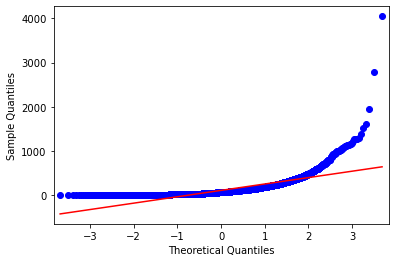

In [51]:
# plot for normality
qqplot(users['ave_length'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [52]:
# normality test
stat, p = shapiro(users['ave_length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.601, p=0.000
Sample does not look Gaussian (reject H0)


In [53]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(users['ave_length'][users['label'] == 0],
                users['ave_length'][users['label'] == 1])
results

MannwhitneyuResult(statistic=2035941.5, pvalue=8.012999638712782e-34)

In [54]:
stats.ttest_ind(users['ave_length'][users['label'] == 0],
                users['ave_length'][users['label'] == 1])

Ttest_indResult(statistic=-0.2731066503809471, pvalue=0.784777721543255)

### **2.2.9 Users' vote counts and vote sum**

***Is there relationship between users' vote counts and vote sum?***

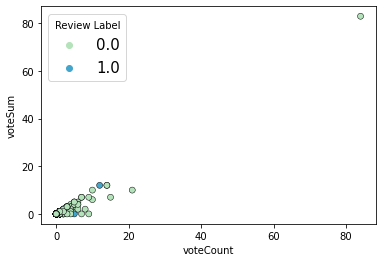

In [55]:
# Examine the correlation between vote counts and vote sums
g = sns.scatterplot(data=users, x="voteCount", y="voteSum", hue='label', palette='GnBu', edgecolor = "black")
g.legend(title = 'Review Label', fontsize = 15) 

In [56]:
corr, _ = pearsonr(users["voteSum"], users["voteCount"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.971


### **2.2.10 Average price paid for apps: Fake vs. Real Users**

In [57]:
user_2 = users.dropna()
user_2.groupby(["label"])["ave_price"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7895.0,0.697807,15.989274,0.0,0.0,0.0,0.000000,999.99
1.0,700.0,0.143541,0.658036,0.0,0.0,0.0,0.010189,9.99


***Is there a difference between real and fake users regarding the average price they paid for applications?***

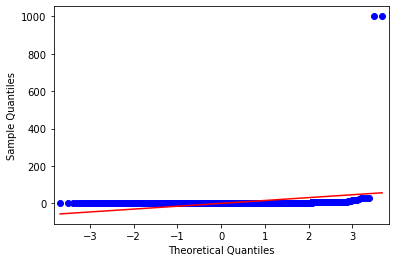

In [58]:
qqplot(user_2['ave_price'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [59]:
# normality test
stat, p = shapiro(user_2['ave_price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.013, p=0.000
Sample does not look Gaussian (reject H0)


In [60]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(user_2['ave_price'][user_2['label'] == 0],
                user_2['ave_price'][user_2['label'] == 1])
results

MannwhitneyuResult(statistic=2526800.0, pvalue=9.74026187465572e-10)

In [61]:
stats.ttest_ind(user_2['ave_price'][user_2['label'] == 0],
                user_2['ave_price'][user_2['label'] == 1])

Ttest_indResult(statistic=0.917029253764453, pvalue=0.3591530467770029)

## **2.3 Analysis of Reviews**

In [62]:
# remember the label of reviews column
df['label'].value_counts()

0    8000
1    8000
Name: label, dtype: int64

### 2.3.1 **Review Time**

In [63]:
pd.crosstab(df['review_year'], df['label'], margins=True).T

review_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
label,,,,,,,,,,,
0,14,77,248,877,1504,1329,1107,1221,1280,343,8000
1,0,0,1,2,11,11,916,3485,2937,637,8000
All,14,77,249,879,1515,1340,2023,4706,4217,980,16000


In [64]:
g = pd.crosstab(df['review_year'], df['label']
           ).reset_index().melt(id_vars='review_year', value_vars=[0,1])

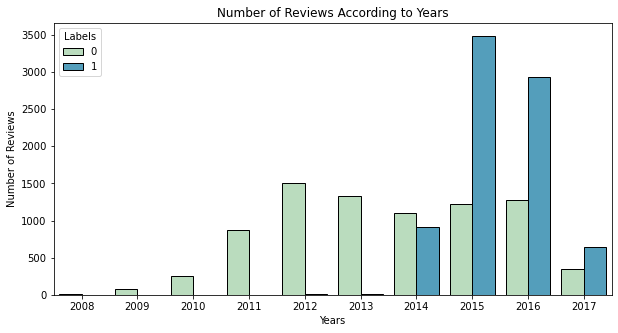

In [65]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x='review_year', y='value', hue='label', data=g, 
            palette='GnBu', edgecolor = "black")
ax.set_title("Number of Reviews According to Years")
ax.set(xlabel="Years", ylabel="Number of Reviews")
ax.legend(title='Labels', loc='upper left')

***Is there a difference between fake and genuine reviews regarding reviews’ publishing years?***

In [66]:
crosstab = pd.crosstab(df['review_year'], df['label']).T

In [67]:
chi2, p, dof, exp = chi2_contingency([crosstab.iloc[0].values,crosstab.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('expected:', exp)

chi2   : 5821.221808012111
p.     : 0.0
dof    : 9
expected: [[   7.    38.5  124.5  439.5  757.5  670.  1011.5 2353.  2108.5  490. ]
 [   7.    38.5  124.5  439.5  757.5  670.  1011.5 2353.  2108.5  490. ]]


**Note:** There has been a dramatic increase in the number of fake comments since 2014. Therefore, I decided to create a new column that shows the review's time whether after or before 2014.

In [68]:
df['year_2014'] = np.where(df['review_year']>= 2014, 1, 0)

In [69]:
crosstab = pd.crosstab(df['year_2014'], df['label'])
crosstab 

label,0,1
year_2014,,
0,4049,25
1,3951,7975


**Is there a difference between fake and genuine reviews regarding publishing year is after or before 2014?**

In [70]:
chi2, p, dof, exp = chi2_contingency([crosstab.iloc[0].values,crosstab.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('expected:', exp)

chi2   : 5329.717845219798
p.     : 0.0
dof    : 1
expected: [[2037. 2037.]
 [5963. 5963.]]


### **2.3.2 Rating of Reviews**

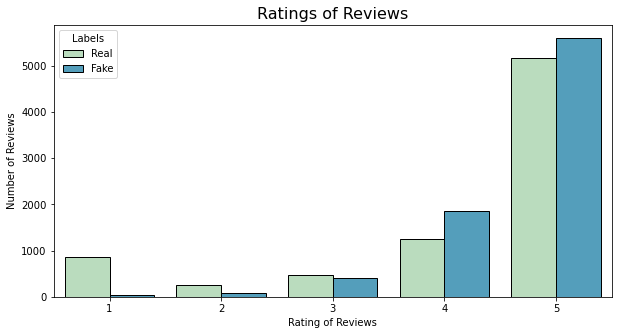

In [71]:
plt.figure(figsize=(10,5))
g = sns.countplot(data=df, x="rating", hue='label', palette='GnBu', edgecolor = "black")
g.set_title("Ratings of Reviews", fontsize=16)
g.set(xlabel="Rating of Reviews",
      ylabel="Number of Reviews")
g.legend(title='Labels', labels = ['Real', 'Fake'], fontsize=10)

In [72]:
crosstab = pd.crosstab(df['label'], df['rating'],margins=True)
crosstab

rating,1,2,3,4,5,All
label,,,,,,
0,863,264,462,1251,5160,8000
1,48,77,402,1868,5605,8000
All,911,341,864,3119,10765,16000


In [73]:
# the percentage of 5 star reviews
10765/16000*100

67.28125

In [74]:
863/911*100

94.7310647639956

**Is there a difference between fake and genuine reviews regarding reviews’ ratings?**

In [75]:
chi2, p, dof, exp = chi2_contingency([crosstab.iloc[0].values,crosstab.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('exp    :', exp)

chi2   : 976.281497105601
p.     : 8.197506272221205e-209
dof    : 5
exp    : [[ 455.5  170.5  432.  1559.5 5382.5 8000. ]
 [ 455.5  170.5  432.  1559.5 5382.5 8000. ]]


**Is there a difference between fake and genuine reviews which have 1 star?**

In [76]:
chisquare([863, 48])

Power_divergenceResult(statistic=729.1163556531284, pvalue=1.3942577338078144e-160)

**Is there a difference between fake and genuine reviews which have 5 star?**

In [77]:
chisquare([5160, 5605])

Power_divergenceResult(statistic=18.39526242452392, pvalue=1.7950373070876915e-05)

### **2.3.4 Length of Reviews**

In [78]:
df.groupby(["label"])["length"].agg(['mean', 'max', 'min', 'std'])

,mean,max,min,std
label,,,,
0,111.839625,4048,2,149.73363
1,121.178875,628,11,58.82655


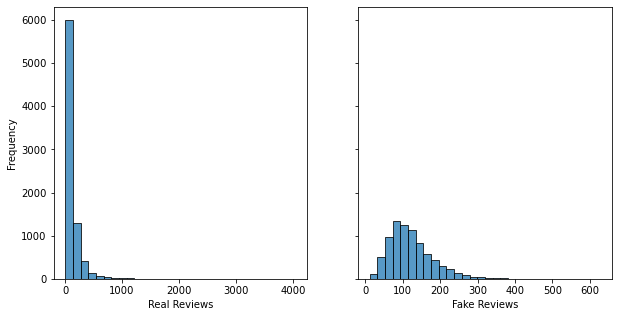

In [79]:
# Histogram of total reviews
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,5))

sns.histplot(df[df['label']==0]['length'], ax=ax0, bins=30, palette='GnBu')
sns.histplot(df[df['label']==1]['length'], ax=ax1, bins=30, palette='GnBu')
ax0.set(xlabel='Real Reviews')
ax1.set(xlabel='Fake Reviews')
ax0.set(ylabel='Frequency')
plt.show()

In [80]:
sampling_difference = df['length'][df['label'] == 0].values - \
                      df['length'][df['label'] == 1].values

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.7324556112289429, pvalue=0.0)

***Is there a difference between fake and genuine reviews regarding the length of review text?***

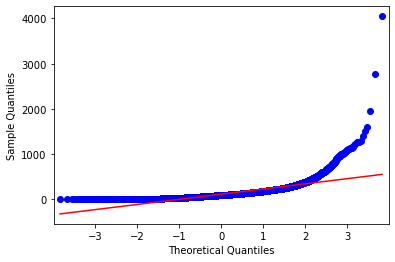

In [81]:
qqplot(df['length'], line='s')
plt.show()

In [82]:
# normality test
stat, p = shapiro(user_2['ave_price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.013, p=0.000
Sample does not look Gaussian (reject H0)


In [83]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df['length'][df['label'] == 0],
                df['length'][df['label'] == 1])
results

MannwhitneyuResult(statistic=21452398.5, pvalue=1.7902438015555947e-285)

In [84]:
stats.ttest_ind(df['length'][df['label'] == 0],
                df['length'][df['label'] == 1])

Ttest_indResult(statistic=-5.1924077965632645, pvalue=2.1013486054987057e-07)

## **2.4 Analysis of Apps** 

In [85]:
df['appId'].nunique()

5624

### ***For All Apps  -  A total of 5624***

In [86]:
# number of fake reviews
df_fk1 = df.groupby(by='appId')['label'].sum()

# Number of total reviews
df_fk2 = df.groupby(by='appId')['label'].count()

# Percentage of fake reviews
df_fk3= round(df.groupby(by='appId')['label'].sum()/df.groupby(by='appId')['label'].count()*100,2)

In [87]:
# Merge three dataframes
df_fk = pd.concat([pd.concat([df_fk1, df_fk2], axis=1), df_fk3], axis=1)
df_fk.set_axis(['totalFakeReview', 'TotalReview', 'AppFakePerc'], axis=1, inplace=True)
df_fk.reset_index(inplace=True)
df_fk.head()

,appId,totalFakeReview,TotalReview,AppFakePerc
0,281656475,0,1,0.0
1,281704574,0,2,0.0
2,281796108,0,8,0.0
3,281940292,0,4,0.0
4,281941097,0,1,0.0


In [88]:
# Get apps unique attributes
df_fk1 = df[['appId', 'app_reviews_total', 'app_reviews_5',
       'app_reviews_4', 'app_reviews_3', 'app_reviews_2', 'app_reviews_1']]

df_fk1 = df_fk1.groupby(by='appId').mean().reset_index()

In [89]:
df_apps = pd.merge(df_fk1, df_fk, how='inner', on='appId')
df_apps.head()

,appId,app_reviews_total,app_reviews_5,app_reviews_4,app_reviews_3,app_reviews_2,app_reviews_1,totalFakeReview,TotalReview,AppFakePerc
0,281656475,5043.0,58.913345,16.319651,7.614515,5.135832,12.016657,0,1,0.0
1,281704574,21562.0,18.078100,14.590483,12.832761,10.073277,44.425378,0,2,0.0
2,281796108,60655.0,64.946006,16.536147,4.209051,3.683126,10.625670,0,8,0.0
3,281940292,25798.0,68.350260,13.020389,4.333669,4.353051,9.942631,0,4,0.0
4,281941097,6022.0,37.462637,12.338094,5.430090,5.596147,39.173032,0,1,0.0


In [90]:
# Create a new column for Application Label
df_apps['app_label'] = np.where(df_apps['AppFakePerc']>0.00, 1, 0)

In [91]:
df_apps['app_label'].value_counts(normalize=True)

0    0.66394
1    0.33606
Name: app_label, dtype: float64

In [138]:
# Append app_label to main dataframe
df_merge = df_apps[['appId', 'app_label']]

df = df.merge(df_merge, how='left', on='appId')

In [19]:
# Rename for further statistics
users.rename(columns={'user_label':'label'}, inplace=True)

### **2.4.1 Ratings of Apps: Fake vs. Real Apps**

In [92]:
g = df_apps.groupby('app_label')['app_reviews_1','app_reviews_2','app_reviews_3','app_reviews_4','app_reviews_5'].mean()
g

,app_reviews_1,app_reviews_2,app_reviews_3,app_reviews_4,app_reviews_5
app_label,,,,,
0,12.553000,4.097542,6.648648,15.388726,61.312084
1,6.357472,2.399107,5.998135,18.509115,66.736171


<Figure size 2160x576 with 0 Axes>

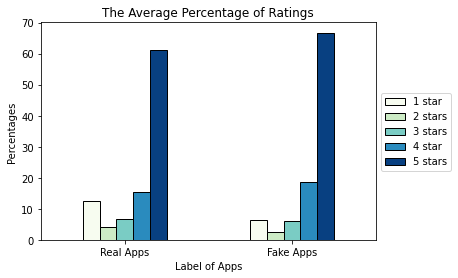

In [93]:
plt.figure(figsize=(30,8))
g=g.reset_index()
g.plot(x='app_label', y=['app_reviews_1','app_reviews_2','app_reviews_3','app_reviews_4','app_reviews_5'],
       kind="bar",  colormap='GnBu',edgecolor = "black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('The Average Percentage of Ratings')
plt.xticks([0, 1], ['Real Apps', 'Fake Apps'], rotation=0)
plt.legend(['1 star', '2 stars', '3 stars', '4 star', '5 stars'], bbox_to_anchor=(1, 0.7))
plt.xlabel('Label of Apps')
plt.ylabel('Percentages')
plt.show()

### **2.4.2 Apps total reviews: Fake vs. Real Apps**

In [94]:
# Descriptive statistics of total reviews.
df_apps.groupby(["app_label"])["app_reviews_total"].describe()

,count,mean,std,min,25%,50%,75%,max
app_label,,,,,,,,
0,3734.0,10519.956079,23785.999966,1.0,504.25,2872.0,9568.75,331024.0
1,1890.0,1418.085185,11702.696866,1.0,5.00,12.0,41.00,246898.0


[Text(0, 0.5, 'Frequency')]

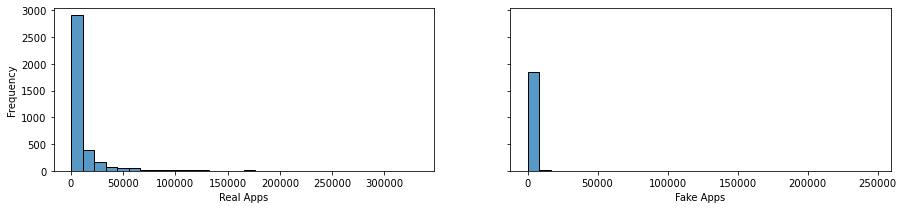

In [95]:
# Histogram of total reviews
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(df_apps[df_apps['app_label']==0]['app_reviews_total'], ax=ax0, bins=30)
sns.histplot(df_apps[df_apps['app_label']==1]['app_reviews_total'], ax=ax1, bins=30)
ax0.set(xlabel='Real Apps')
ax1.set(xlabel='Fake Apps')
ax0.set(ylabel='Frequency')

***Is there a difference between real and fake applications regarding total reviews?***

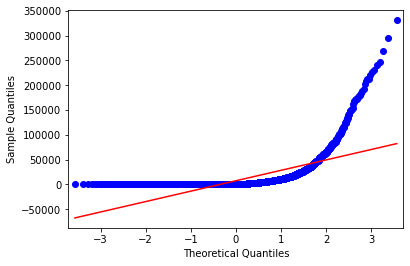

In [96]:
# Check normality
qqplot(df_apps['app_reviews_total'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [97]:
# normality test
stat, p = shapiro(df_apps['app_reviews_total'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.372, p=0.000
Sample does not look Gaussian (reject H0)


In [98]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df_apps['app_reviews_total'][df_apps['app_label'] == 0],
                df_apps['app_reviews_total'][df_apps['app_label'] == 1])
results

MannwhitneyuResult(statistic=6450318.5, pvalue=0.0)

In [99]:
stats.ttest_ind(df_apps['app_reviews_total'][df_apps['app_label'] == 0],
                df_apps['app_reviews_total'][df_apps['app_label'] == 1])

Ttest_indResult(statistic=15.701086758889346, pvalue=2.098937234214872e-54)

### ***For Apps in Apps Dataset  -  A total of 5563***

**Note:** I have 5624 apps that comes from features dataframe and 5563 apps from app dataframe. Some apps' information is missing. 148 reviews of 61 applications are missing in dataframe.

In [100]:
# Get app related columns 

df_appr = df[['appId', 'price', 'paid','allRatingAverge','allRatingCount', 
   'curentRatingAverage','currentRatingCount', 'diff_init_curr_2', 
   'version_major', 'primaryGenre']]

In [101]:
df_appr.isna().sum()

appId                    0
price                  148
paid                   148
allRatingAverge        148
allRatingCount         148
curentRatingAverage    148
currentRatingCount     148
diff_init_curr_2       148
version_major          148
primaryGenre           148
dtype: int64

In [102]:
df_appr = df_appr.drop_duplicates(subset=['appId'])

In [103]:
# 61 apps info is missing
df_appr.isna().sum()

appId                   0
price                  61
paid                   61
allRatingAverge        61
allRatingCount         61
curentRatingAverage    61
currentRatingCount     61
diff_init_curr_2       61
version_major          61
primaryGenre           61
dtype: int64

In [104]:
# Merge df_apps and other info of apps
df_apps = pd.merge(df_apps, df_appr, how='inner', on='appId')

In [105]:
# drop 61 apps whose data is missing
df_apps.dropna(axis=0, inplace=True)

In [106]:
df_apps['appId'].nunique()

5563

### **2.4.3 Apps price: Fake vs. Real Apps**

In [107]:
df_apps['price'] = round(df_apps['price'],2)

In [108]:
# Descriptive statistics of total reviews.
df_apps.groupby(["app_label"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
app_label,,,,,,,,
0,3693.0,0.879012,16.555748,0.0,0.0,0.0,0.0,999.99
1,1870.0,0.144791,0.856589,0.0,0.0,0.0,0.0,24.99


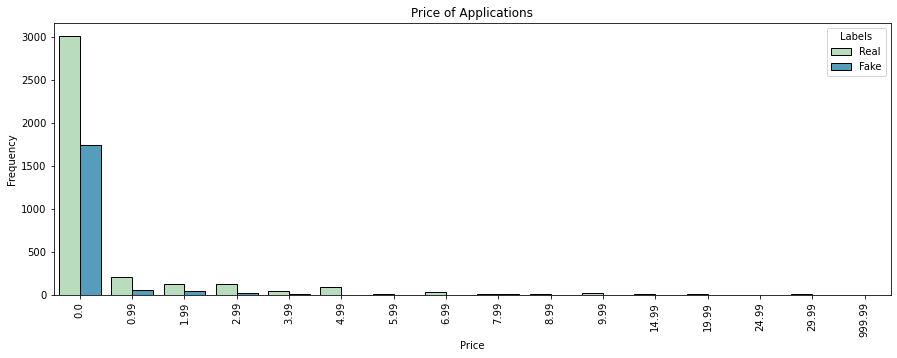

In [109]:
plt.figure(figsize=(15,5))
g = sns.countplot(data=df_apps, x="price", hue='app_label', palette='GnBu', edgecolor = "black")
g.set_title("Price of Applications")
g.set(xlabel="Price",
      ylabel="Frequency")
plt.xticks(rotation=90)
g.legend(title='Labels', labels = ['Real', 'Fake'], loc='upper right')
plt.show()

[Text(0, 0.5, 'Frequency')]

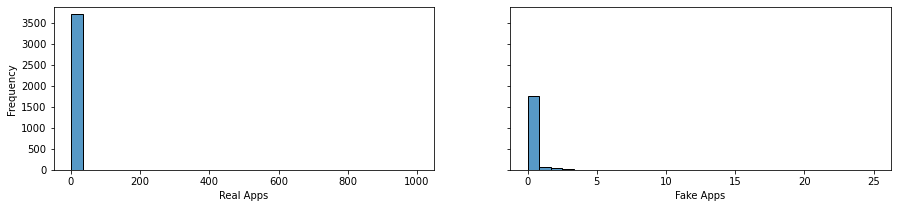

In [110]:
# Histogram of prices
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(df_apps[df_apps['app_label']==0]['price'], ax=ax0, bins=30)
sns.histplot(df_apps[df_apps['app_label']==1]['price'], ax=ax1, bins=30)
ax0.set(xlabel='Real Apps')
ax1.set(xlabel='Fake Apps')
ax0.set(ylabel='Frequency')

***Is there a difference between real and fake applications regarding apps' price?***

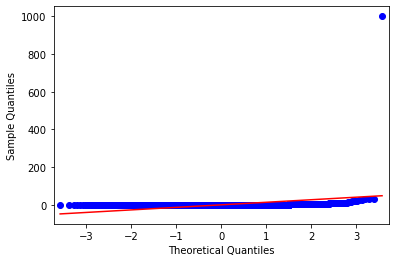

In [111]:
# Check normality
qqplot(df_apps['price'], line='s')
plt.show()

In [112]:
# normality test
stat, p = shapiro(df_apps['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.014, p=0.000
Sample does not look Gaussian (reject H0)


In [113]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df_apps['price'][df_apps['app_label'] == 0],
                df_apps['price'][df_apps['app_label'] == 1])
results

MannwhitneyuResult(statistic=3873103.5, pvalue=6.621848309173135e-34)

In [114]:
stats.ttest_ind(df_apps['price'][df_apps['app_label'] == 0],
                df_apps['price'][df_apps['app_label'] == 1])

Ttest_indResult(statistic=1.9163947867086504, pvalue=0.055366067736684385)

### **2.4.4 Paid or Free: Fake vs. Real Apps**

In [115]:
crosstab = pd.crosstab(df_apps['app_label'],df_apps['paid'])
crosstab

paid,0.0,1.0
app_label,,
0,3012,681
1,1746,124


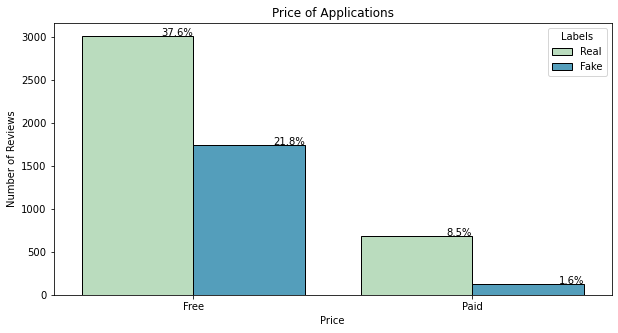

In [116]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_apps, x="paid", hue='app_label',palette='GnBu', edgecolor = "black")
ax.set_title("Price of Applications")
ax.set(xlabel="Price", ylabel="Number of Reviews")
ax.set_xticklabels(['Free','Paid'])
ax.legend(title='Labels', labels = ['Real', 'Fake'], loc='upper right')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/8000)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x, y), ha='right')
plt.show()

***Is there a difference between real and fake applications regarding they are paid or free?***

In [117]:
chi2, p, dof, exp = chi2_contingency([crosstab.iloc[0].values,crosstab.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('expected :', exp)

chi2   : 138.92766311683576
p.     : 4.5678860667932964e-32
dof    : 1
expected : [[3158.60039547  534.39960453]
 [1599.39960453  270.60039547]]


### **2.4.5 Apps' primary genre: Fake vs. Real Apps**

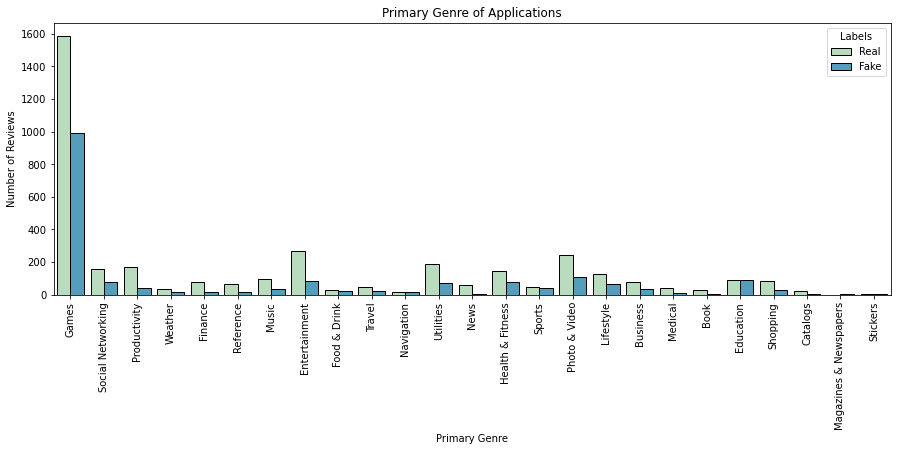

In [118]:
plt.figure(figsize=(15,5))
g = sns.countplot(data=df_apps, x="primaryGenre", hue='app_label',palette='GnBu', edgecolor = "black")
g.set_title("Primary Genre of Applications")
g.set(xlabel="Primary Genre",
      ylabel="Number of Reviews")
g.legend(title='Labels', labels = ['Real', 'Fake'], loc='upper right' )
plt.xticks(rotation=90)
plt.show()

**Is there a difference between real and fake applications regarding primary genres?**

In [119]:
crosstab = pd.crosstab(df_apps['primaryGenre'], df_apps['app_label'], margins=True)
crosstab

app_label,0,1,All
primaryGenre,,,
Book,30,4,34
Business,77,32,109
Catalogs,21,3,24
Education,89,91,180
Entertainment,268,86,354
Finance,74,16,90
Food & Drink,29,19,48
Games,1588,988,2576
Health & Fitness,143,80,223


**Is there a difference between real and fake applications whose genre is game?**

In [120]:
chisquare([1588,988])

Power_divergenceResult(statistic=139.75155279503105, pvalue=3.016780677381206e-32)

**Is there a difference between real and fake applications whose genre is entertainment?**

In [121]:
chisquare([268,86])

Power_divergenceResult(statistic=93.57062146892656, pvalue=3.9196256208391787e-22)

**Is there a difference between real and fake applications whose genre is education?**

In [122]:
chisquare([89,91])

Power_divergenceResult(statistic=0.022222222222222223, pvalue=0.8814974521910135)

### **2.4.6 Apps all rating average: Fake vs. Real Apps**

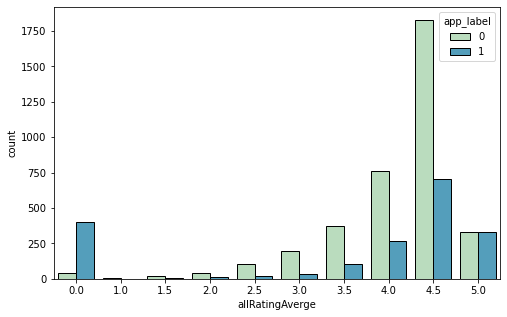

In [123]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_apps, x ='allRatingAverge', hue='app_label',palette='GnBu', edgecolor = "black")
g.set_title("All Average Rating of Applications")
g.set(xlabel="Average Ratings",
      ylabel="Number of Reviews")
g.legend(title='Labels', labels = ['Real', 'Fake'], loc='upper left')
plt.show()

### **2.4.7 App version: Fake vs. Real Apps**

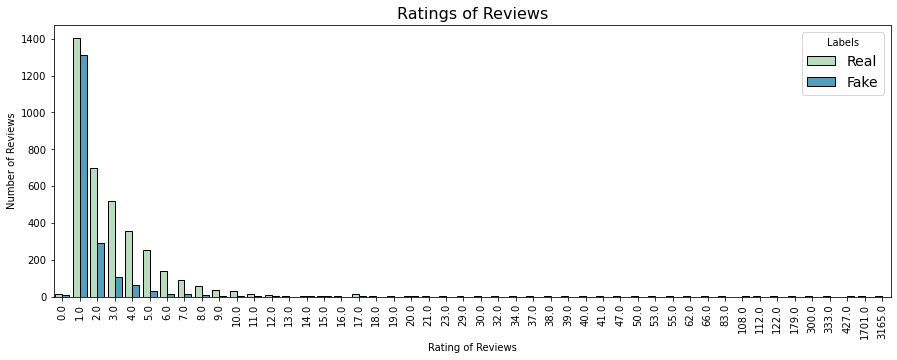

In [124]:
plt.figure(figsize=(15,5))
g = sns.countplot(data=df_apps, x="version_major", hue='app_label', palette='GnBu', edgecolor = "black")
g.set_title("Ratings of Reviews", fontsize=16)
g.set(xlabel="Rating of Reviews",
      ylabel="Number of Reviews")
g.legend(title='Labels', labels = ['Real', 'Fake'], fontsize=14, loc='upper right')
plt.xticks(rotation=90)
plt.show()

### **2.4.8 Time difference initial and current release: Fake vs. Real Apps**

In [125]:
df_apps["diff_init_curr_2"]=(df_apps["diff_init_curr_2"] / np.timedelta64(1, 'D')).astype(int)

In [126]:
# Descriptive statistics of total reviews.
df_apps.groupby(["app_label"])["diff_init_curr_2"].describe()

,count,mean,std,min,25%,50%,75%,max
app_label,,,,,,,,
0,3693.0,1213.952613,826.701849,0.0,507.0,1167.0,1844.00,3167.0
1,1870.0,354.428877,479.060551,0.0,7.0,157.0,530.75,3147.0


[Text(0, 0.5, 'Frequency')]

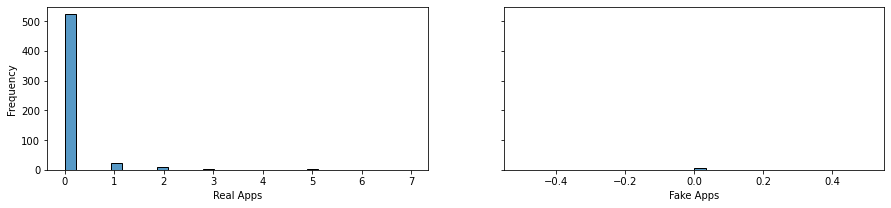

In [127]:
# Histogram of prices
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(df_apps[df_apps['diff_init_curr_2']==0]['price'], ax=ax0, bins=30)
sns.histplot(df_apps[df_apps['diff_init_curr_2']==1]['price'], ax=ax1, bins=30)
ax0.set(xlabel='Real Apps')
ax1.set(xlabel='Fake Apps')
ax0.set(ylabel='Frequency')

***Is there a difference between real and fake applications regarding apps' price?***

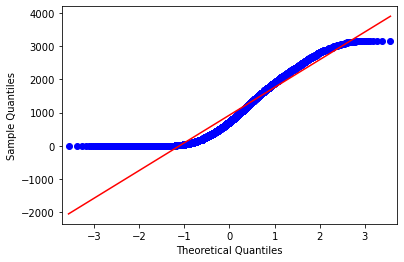

In [128]:
# Check normality
qqplot(df_apps['diff_init_curr_2'], line='s')
plt.show()

In [129]:
# normality test
stat, p = shapiro(df_apps['diff_init_curr_2'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.907, p=0.000
Sample does not look Gaussian (reject H0)


In [130]:
# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df_apps['diff_init_curr_2'][df_apps['app_label'] == 0],
                df_apps['diff_init_curr_2'][df_apps['app_label'] == 1])
results

MannwhitneyuResult(statistic=5663707.0, pvalue=0.0)

In [131]:
stats.ttest_ind(df_apps['diff_init_curr_2'][df_apps['app_label'] == 0],
                df_apps['diff_init_curr_2'][df_apps['app_label'] == 1])

Ttest_indResult(statistic=41.56414902949182, pvalue=0.0)

# Download dataframe for pre-processing

In [139]:
df.shape

(16000, 188)

In [144]:
# download the dataframe as .csv to use in EDA
from IPython.display import FileLink, FileLinks

df.to_csv('/Users/handedede/Desktop/data/data_preprocess.csv', index=False)